<a href="https://colab.research.google.com/github/Olufems/Datathon23/blob/main/Model_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assessing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [3]:
cd 'drive/My Drive'

/content/drive/My Drive


In [4]:
cd '/content/drive/MyDrive/DatafestAfrica/'

/content/drive/MyDrive/DatafestAfrica


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})
pd.set_option('display.max_columns', 50)
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DatafestAfrica/FraudDetectionDataset1.csv')

In [7]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [15]:
# Convert Transaction Date and Time column to datetime data type
df["Transaction Date and Time"] = pd.to_datetime(df["Transaction Date and Time"])

In [8]:
# Get categoral varible with unique values less than or equal to 40
cat_df_below_40 = df.select_dtypes(include=['object']).nunique()
selected_columns = cat_df_below_40[cat_df_below_40 <= 40]
cat_df = df[selected_columns.index]

In [9]:
# Get numerical columns
numerical_df = df.select_dtypes(include=['int', 'float']).drop(columns=['Transaction ID', 'User ID','Merchant ID','Fraudulent Flag'])


## Feature Engineering

In [11]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [16]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Transaction Date and Time'].dt.dayofweek
# Extract month
df['Month'] = df['Transaction Date and Time'].dt.month
# Extract day of the month
df['DayOfMonth'] = df['Transaction Date and Time'].dt.day

In [17]:
day_mapping = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}

# Use the .map() function to create a new 'DayName' column
df['DayName'] = df['DayOfWeek'].map(day_mapping)

Friday       14.369483
Sunday       14.338717
Saturday     14.332850
Monday       14.256683
Tuesday      14.247317
Wednesday    14.234450
Thursday     14.220500
Name: DayName, dtype: float64


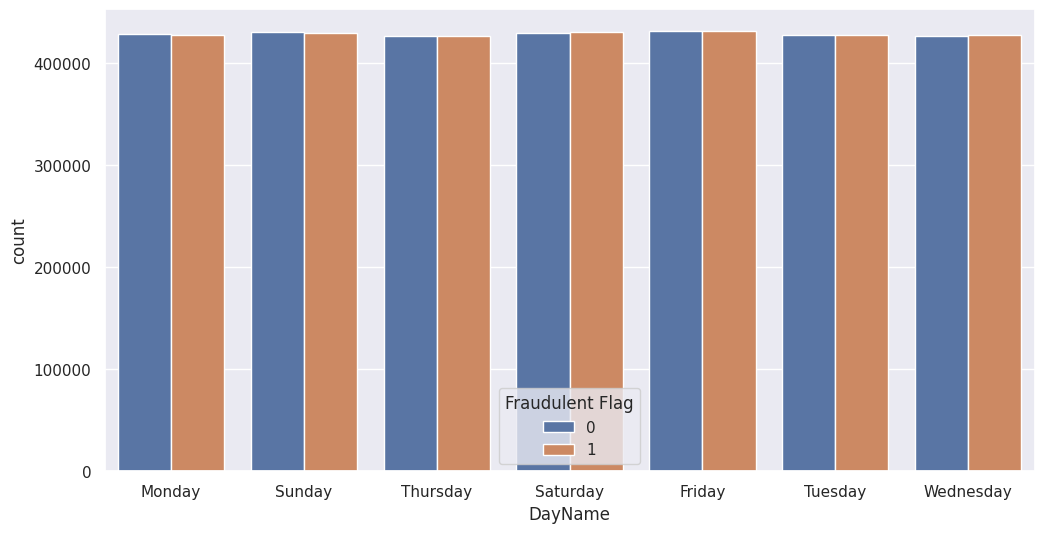

In [18]:
print(df['DayName'].value_counts(normalize=True)*100)
sns.countplot(df, x= "DayName", hue="Fraudulent Flag");

In [19]:
# Define a mapping dictionary for month names
month_mapping = {1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',
    9: 'September',10: 'October',11: 'November',12: 'December'}
# Use the .map() function to create a new 'MonthName' column
df['MonthName'] = df['Month'].map(month_mapping)

May          9.910300
March        9.890533
January      9.874617
July         9.757467
April        9.591667
June         9.565100
February     8.915317
August       6.584767
December     6.583917
October      6.561833
November     6.389683
September    6.374800
Name: MonthName, dtype: float64


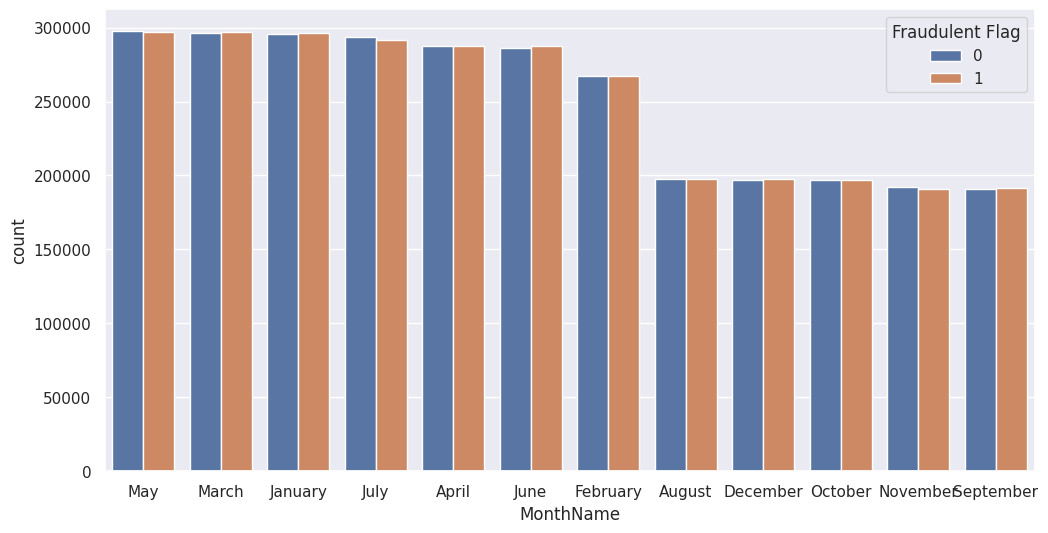

In [20]:
print(df['MonthName'].value_counts(normalize=True)*100)
sns.countplot(df, x= "MonthName", hue="Fraudulent Flag", order=df['MonthName'].value_counts().index);

In [21]:
df.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'IP Address',
       'Browser Type', 'Operating System', 'Merchant Category', 'User Age',
       'User Occupation', 'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Credit Score',
       'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag', 'DayOfWeek',
       'Month', 'DayOfMonth', 'DayName', 'MonthName'],
      dtype='object')

In [22]:
# Drop columns with high cardinality and IDs
df.drop(columns=['Transaction ID','Merchant ID','Transaction Date and Time','DayName', 'MonthName', 'IP Address', 'User Income'], inplace=True)

In [23]:
# Encode categorical variable
label_encoder = LabelEncoder()

# Iterate through the specified columns and encode each one
for column in df.select_dtypes(include=['object']):
    df[column] = label_encoder.fit_transform(df[column])

In [24]:
df.head()

,User ID,Transaction Amount,Payment Method,Country Code,Transaction Type,Device Type,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,DayOfWeek,Month,DayOfMonth
0,9822,163.08,1,19,6,10,15,27,22,68,7,6,11,19,9.34,24.22,0,26,2.71,37,24,9,343,3,3,5,0,0,1,2
1,4698,430.74,0,38,5,18,2,33,4,22,5,2,9,32,65.28,55.11,0,60,3.95,18,11,6,688,10,13,18,1,6,9,12
2,8666,415.74,20,21,29,34,21,1,29,71,16,3,11,26,44.05,53.84,0,81,3.81,24,22,0,371,27,7,33,1,3,1,12
3,9012,565.89,10,30,22,16,14,6,0,78,16,0,10,6,21.70,21.62,0,18,2.67,30,6,20,687,24,15,32,1,5,2,27
4,5185,955.49,39,13,0,27,1,28,23,31,17,3,3,30,56.63,53.71,0,98,3.19,14,31,11,605,20,17,21,1,5,9,24


In [25]:
df.shape

(6000000, 30)

## Model Training

In [27]:
from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import (ConfusionMatrixDisplay,classification_report,confusion_matrix,)
from sklearn.model_selection import GridSearchCV, train_test_split

#### Split

In [28]:
# Splitting columns into features and target
X = df.drop(columns="Fraudulent Flag")
y = df["Fraudulent Flag"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6000000, 29)
y shape: (6000000,)


In [29]:
# Initialize Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

#### Build Model

In [30]:
# Calculate Baseline Accuracy
acc_baseline = y.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5


In [31]:
# Initialize a list to store cross-validation results
cv_accuracies = []
cv_f1_scores = []

# Loop through each fold
for train_index, test_index in skf.split(X, y):
    # Split the data into training and testing sets for this fold
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Initialize the RandomForest model
    model = RandomForestClassifier(n_estimators=25, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', verbose=1, n_jobs=4, class_weight="balanced", random_state=42)

    # Train the model on the training data for this fold
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_val)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val, y_pred)

    # Calculate F1 score for this fold
    f1 = f1_score(y_val, y_pred)

    # Append the accuracy and F1 score to the lists
    cv_accuracies.append(accuracy)
    cv_f1_scores.append(f1)

    # Print the accuracy and F1 score for this fold
    print(f"Accuracy for this fold: {accuracy}")
    print(f"F1 Score for this fold: {f1}")
    print("="*30)

# Calculate the mean accuracy and mean F1 score
mean_accuracy = np.mean(cv_accuracies)
mean_f1 = np.mean(cv_f1_scores)

# Print the mean accuracy and mean F1 score
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean F1 Score: {mean_f1}")


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  9.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    4.8s finished


Accuracy for this fold: 0.500026
F1 Score for this fold: 0.4863453212871623


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  9.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    4.4s finished


Accuracy for this fold: 0.5003613333333333
F1 Score for this fold: 0.4944265754267428


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  9.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.6s finished


Accuracy for this fold: 0.5003613333333333
F1 Score for this fold: 0.4960041209604097


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  9.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    4.3s finished


Accuracy for this fold: 0.4994806666666667
F1 Score for this fold: 0.4924065053292723
Mean Accuracy: 0.5000573333333334
Mean F1 Score: 0.4922956307508968


#### Evaluation

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.5s finished


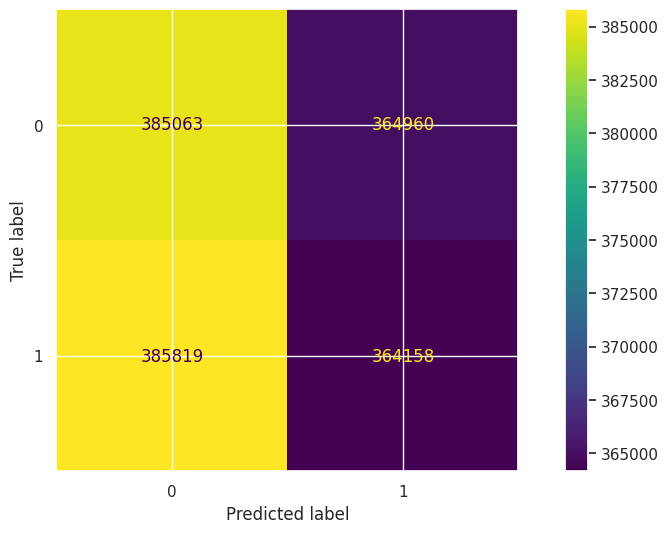

In [36]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_val, y_val);

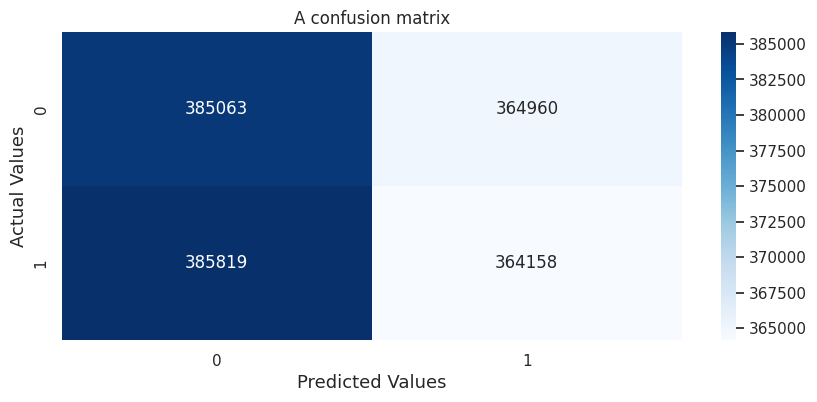

In [37]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot = True,  fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted Values', fontsize = 13)
plt.ylabel('Actual Values', fontsize = 13)
plt.title('A confusion matrix');

In [38]:
# Print classification report
print(classification_report(y_val, model.predict(X_val)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    3.6s finished


              precision    recall  f1-score   support

           0       0.50      0.51      0.51    750023
           1       0.50      0.49      0.49    749977

    accuracy                           0.50   1500000
   macro avg       0.50      0.50      0.50   1500000
weighted avg       0.50      0.50      0.50   1500000



#### Communicate Result (Feature Importance

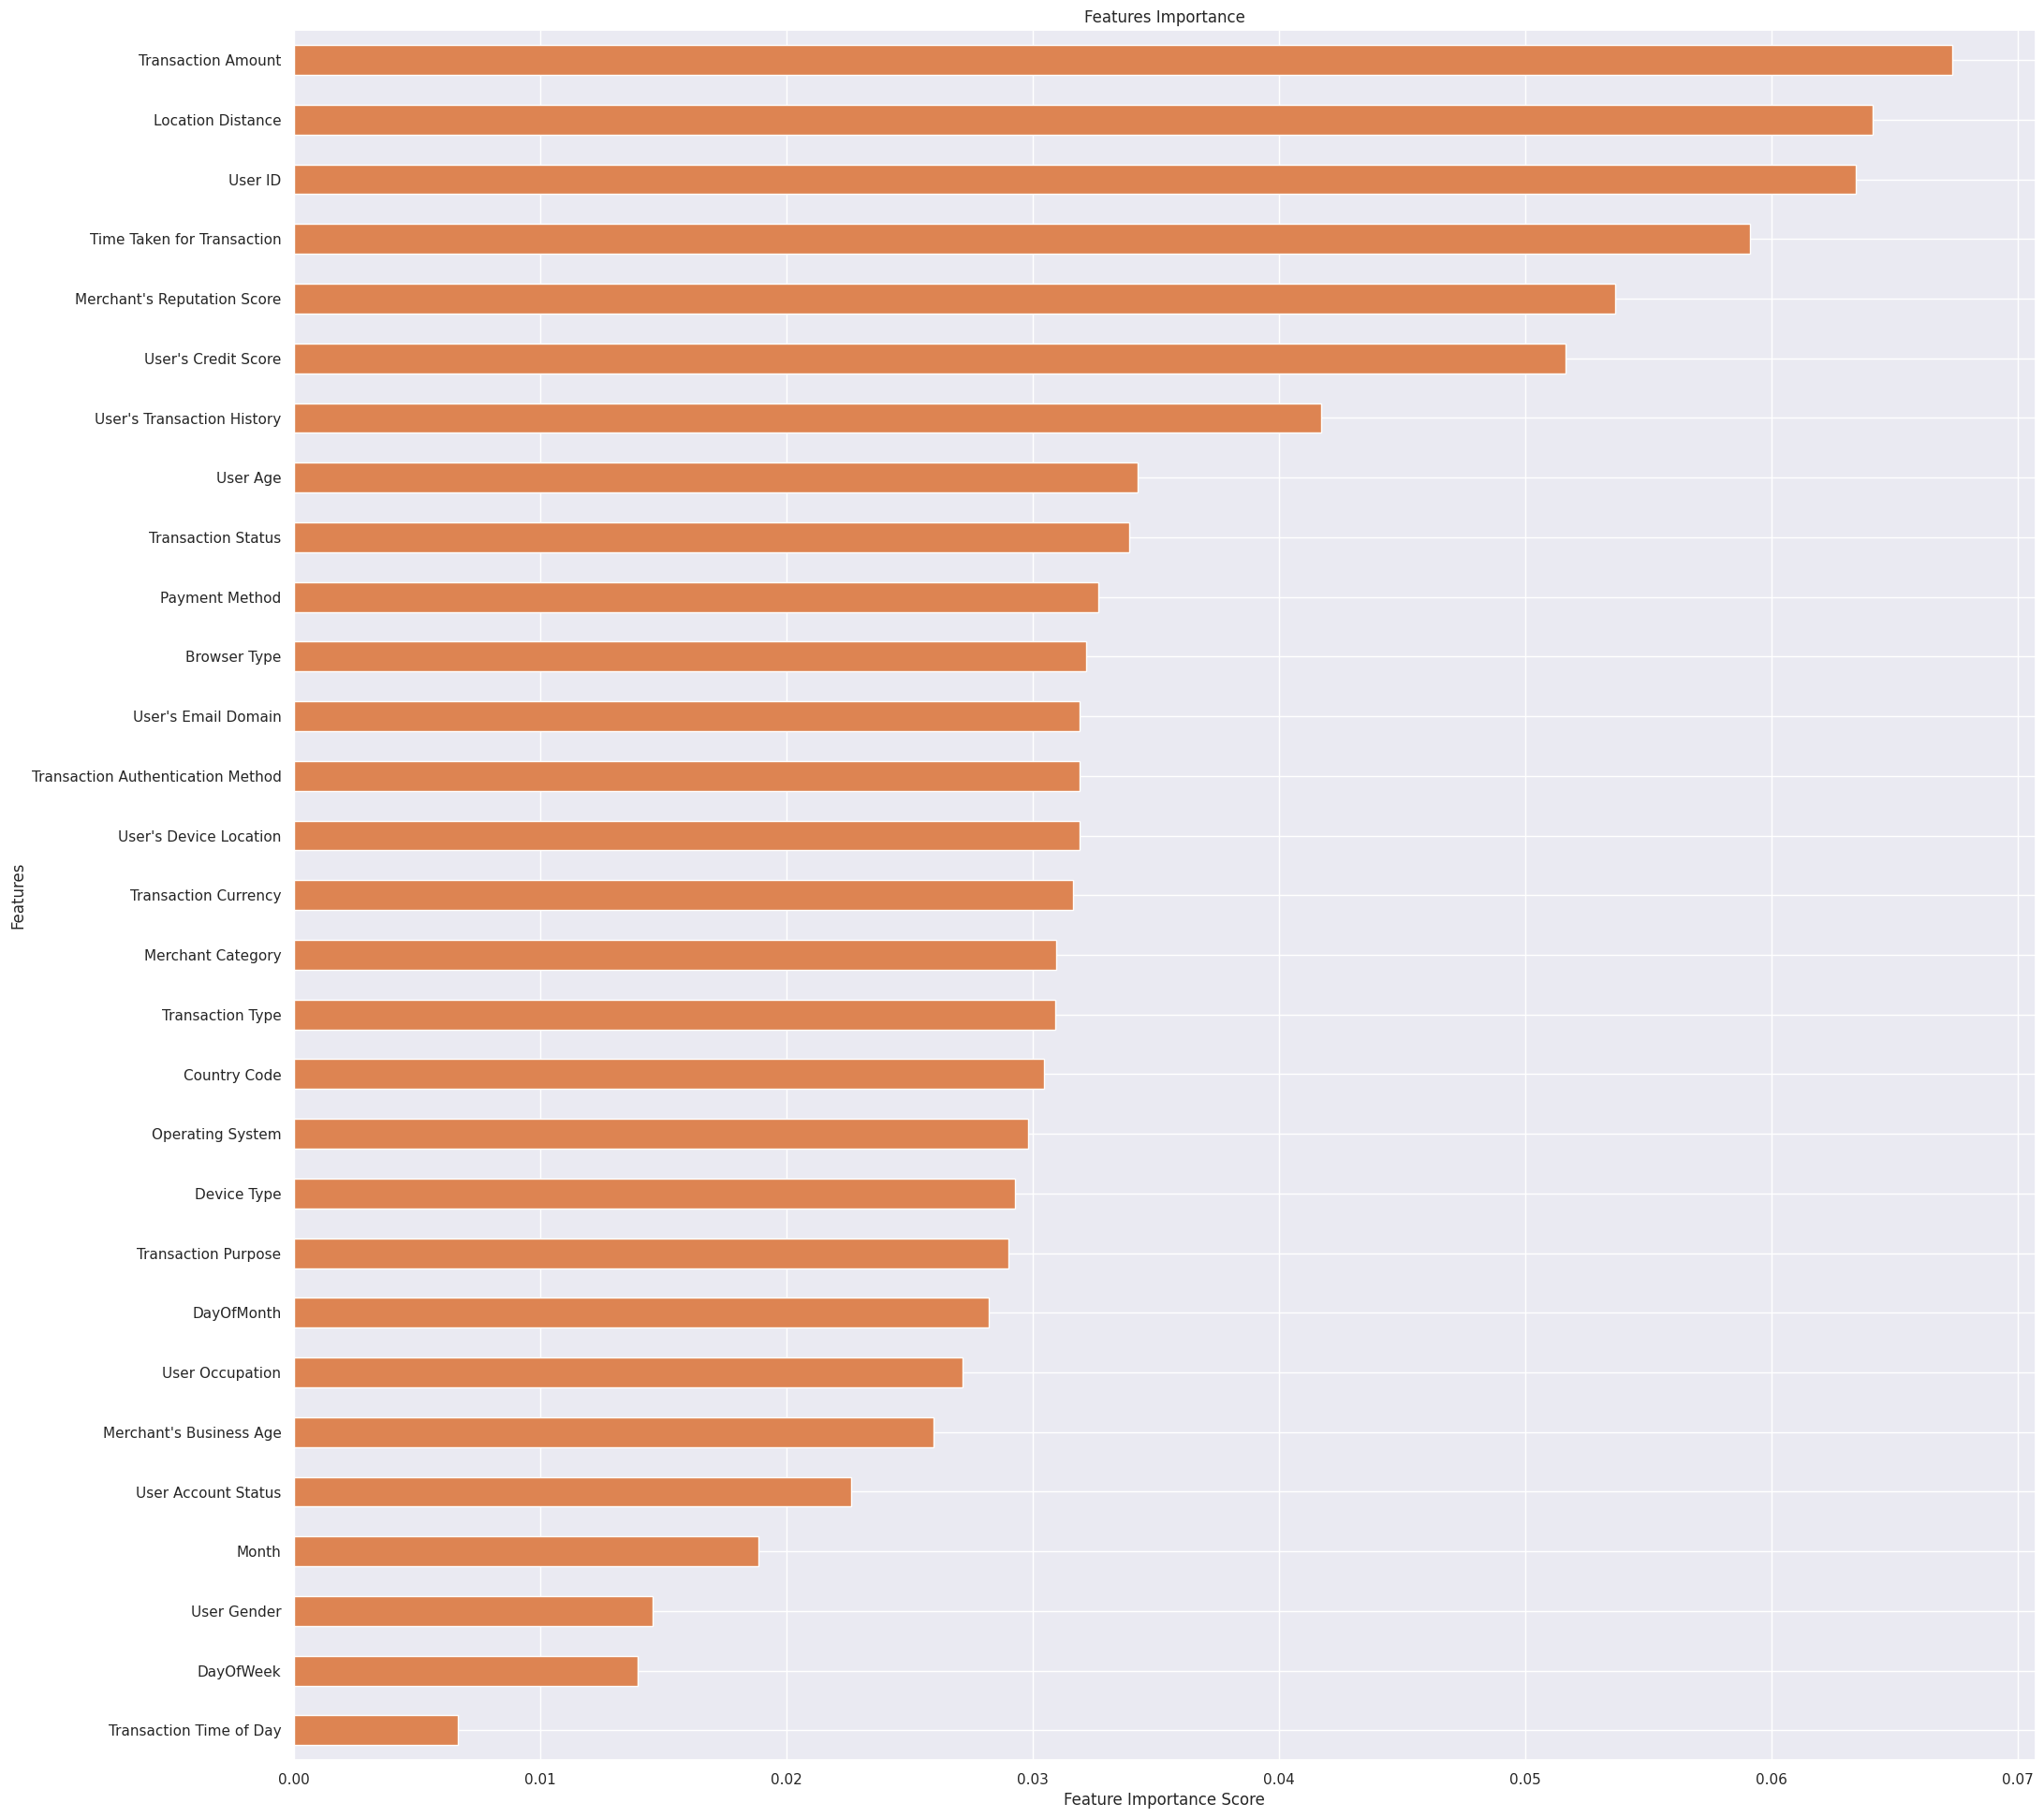

In [40]:
fig, ax = plt.subplots(figsize = [24,24])
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
feature_scores.plot(kind='barh', color=sns.color_palette()[1], title='Features Importance',
                    xlabel='Feature Importance Score', ylabel='Features', ax=ax);

#### HyperParameter Tuning

In [32]:
# params = {
#     "n_estimators" : range(25,101,25),
#     "max_depth" : range(5,46,10)
# }
# model = GridSearchCV(model, param_grid=params, cv=4, n_jobs=4, verbose=1 )
# model

In [33]:
# model.fit(X_train, y_train)

In [34]:
# best_params = model.best_params_
# print(best_params)

In [35]:
# acc_train = model.score(X_train, y_train)
# acc_test = model.score(X_val, y_val)

# print("Training Accuracy:", round(acc_train, 4))
# print("Validation Accuracy:", round(acc_test, 4))